# Simulation using `SKAT.haplotypes` data in R `SKAT` package

## Generate data 

We use haplotype data ([`SKAT.haplotypes`](https://cran.r-project.org/web/packages/SKAT/SKAT.pdf#page=23)) in R [`SKAT`](https://cran.r-project.org/web/packages/SKAT/SKAT.pdf) package to generate genotype matrix. This dataset is generated by calibration coalescent model (COSI) with mimicking LD structure of European ancestry.
Load `RCall` package, which allows us to call R packages from within Julia.

In [13]:
using RCall

In [14]:
R"""
    packages <- c("SKAT", "gglasso")
    if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
    install.packages(setdiff(packages, rownames(installed.packages())))
    }
    library(SKAT)
    data("SKAT.haplotypes")
    Haplotype <- SKAT.haplotypes$Haplotype
    SNPInfo <- SKAT.haplotypes$SNPInfo
""";

`SKAT.haplotypes` consists of two objects: `Haplotype` matrix and `SNPInfo` dataframe.
`Haplotype` is a matrix of size $10,000\times 3845$ where each row represents a different haplotype and each column represents a different SNP marker. 

In [15]:
@rget Haplotype

10000×3845 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  1  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  

`SNPInfo` contains information about 3,845 SNPs in `Haplotype` matrix. All SNPs come from chromosome 1, and chromosome position ranges from 79 to 199956, or over 200k base pair region. 

In [16]:
@rget SNPInfo

,SNP,CHROM,CHROM_POS,ALLELE1,FREQ1,ALLELE2,FREQ2
,Int64,Int64,Int64,Int64,Float64,Int64,Float64
1,1,1,79,1,0.0008,2,0.9992
2,2,1,281,1,0.0001,2,0.9999
3,3,1,344,1,0.0001,2,0.9999
4,4,1,385,1,0.001,2,0.999
5,5,1,403,1,0.0011,2,0.9989
6,6,1,428,1,0.1387,2,0.8613
7,7,1,501,1,0.1051,2,0.8949
8,8,1,536,1,0.0011,2,0.9989
9,9,1,607,1,0.0015,2,0.9985


Assume one gene to be 5kb long, which translates to having 40 genes. We also assume sample size to be 500.

In [17]:
m = 40 # no. of genes
pj = 5000 # gene size 
n = 500 # sample size

500

Suppose that there are 5 causal genes, and that they are evenly spread across all 40 genes/groups. 

In [18]:
σ2 = zeros(m + 1)
σ2[end] = 1.0
for iter in Int.(round.(range(1, stop=m, length=5)))
     σ2[iter] = 5.0
end

These genes have positive variance components:

In [19]:
Int.(round.(range(1, stop=m, length=5)))

5-element Array{Int64,1}:
  1
 11
 20
 30
 40

Set seed first. 

In [20]:
using Random
Random.seed!(123);

To create a genotype matrix whose entries consist of {0,1,2}, we select `2n` rows from `Haplotype` without replacement and add the first `n` rows to the last `n` rows.

In [21]:
using StatsBase, LinearAlgebra
n = 500 # sample size 
idx = zeros(Int64, 2n)
sample!(1:size(Haplotype, 1), idx; replace=false)

# add two haplotype matrices to create a big block of genotype matrix
G = Haplotype[idx[1:n], :] + Haplotype[idx[n + 1:end], :]

500×3845 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  2  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  2  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  …  0  0  0  0  0  0  2  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0 

Now we construct covariance matrix `V[i]` for gene `i` by splitting up `G` matrix by chromosome position (5kb), multiplying by its transpose, and dividing by its Frobenius norm. 
Finally, we add these covariance matrices multiplied by variance component to create the overall covariance matrix `Ω` where $$\Omega = \sum_{i=1}^m \sigma_i^2 V_i + \sigma_0^2 I.$$

In [22]:
## construct covariance matrix Ω
Ω  = zeros(n, n)
grp_id = zeros(Int64, size(Haplotype, 2))
V  = Array{Matrix{Float64}}(undef, m + 1)
for k in 1:m
    local k
    i = k
    grp_id[(SNPInfo.CHROM_POS .> pj * (i-1)) .& (SNPInfo.CHROM_POS .<= pj * i)] .= i
    Vi = view(G, :, grp_id .== i)
    V[i] = Vi * Vi'
    V[i] ./= norm(V[i])
    Ω .+= σ2[i] .* V[i]
end
V[m + 1] = Matrix{Float64}(I, n, n) ./ √n
Ω .+= σ2[m + 1] .* V[m + 1]
Ωchol = cholesky(Symmetric(Ω)) # cholesky factorization after making it symmetric 

Cholesky{Float64,Array{Float64,2}}
U factor:
500×500 UpperTriangular{Float64,Array{Float64,2}}:
 0.286665  0.0308989  0.0         0.0929487   …   0.0           0.0189187  
  ⋅        0.314658   0.0736505   0.0190226       0.101801      0.0264071  
  ⋅         ⋅         0.31854    -0.00439827      0.104943      0.0218148  
  ⋅         ⋅          ⋅          0.351454        0.0575279     0.0555649  
  ⋅         ⋅          ⋅           ⋅              0.0366417     0.0350243  
  ⋅         ⋅          ⋅           ⋅          …   0.0636818     0.0445843  
  ⋅         ⋅          ⋅           ⋅              0.0735116     0.0241263  
  ⋅         ⋅          ⋅           ⋅              0.0334636    -0.0561523  
  ⋅         ⋅          ⋅           ⋅             -0.0718995     0.118174   
  ⋅         ⋅          ⋅           ⋅              0.0737071    -0.00769136 
  ⋅         ⋅          ⋅           ⋅          …   0.00933045    0.00570924 
  ⋅         ⋅          ⋅           ⋅             -0.014867      0.01

We also generate a covariate matrix with 10 covariates. 

In [23]:
p = 10
X = randn(n, p)

500×10 Array{Float64,2}:
  0.208919   -0.357512  -1.20512   …  -2.28353    0.469279   -0.4246    
  0.196372    1.10493    0.510995      0.94911    1.05211     0.190831  
 -0.964934    0.360943  -0.797932     -0.136343  -0.607956    0.0199318 
  0.17751     1.07779    1.01809      -1.60784    0.775929   -0.412176  
  1.59153     0.211548   0.887211     -0.899853  -2.34106     0.0259707 
 -0.151672   -2.1254    -1.2528    …   1.39219    0.47917     0.170861  
 -2.63614     1.04942    1.20896      -0.256876  -0.458283   -0.667652  
  0.822095   -0.354441   0.197945     -0.372056   0.313368   -0.358023  
 -1.30325    -0.160404  -0.613613      0.881436   1.7622     -1.33322   
 -1.1814     -0.60608    0.557166     -0.657915  -1.65057     0.969906  
  2.23366     0.43255    0.968414  …   2.48333    1.7669      0.172893  
  1.13666    -1.24071   -0.819892      1.15584    1.17051     0.531119  
 -1.09657    -0.528542  -1.16037      -0.772672  -0.416337   -0.168258  
  ⋮                       

Finally, we create a response vector using the Cholesky factorization.

In [24]:
β = ones(p)
y = X * β + Ωchol.L * randn(n) 

500-element Array{Float64,1}:
 -4.545804720152172 
  9.554438488673872 
 -2.2192477506797488
 -2.0143970037761805
  0.1104655736896164
 -3.875815486848486 
  1.3821967784546783
  2.313158560447355 
 -4.416332034149308 
 -3.8306940844226953
  6.857835924330509 
  5.754666454741338 
 -2.9589237786495675
  ⋮                 
  0.4678309058131852
  2.35901109726784  
 -4.2082139307110165
 -0.6635539857801465
  2.619826684097063 
  5.3827763283445185
 -2.2602354367020547
  2.601577888797258 
  0.589233811611282 
 -1.3458128723463212
 -1.3938624805614621
 -2.4166872919288918

## Perform variance component selection

Finally, we are ready to perform variance component selection. We add necessary packages. 

In [25]:
using VarianceComponentSelect

┌ Info: Recompiling stale cache file /Users/juhyun-kim/.julia/compiled/v1.1/VarianceComponentSelect/iiLmX.ji for VarianceComponentSelect [684d1ed6-5d62-11e9-0c0b-878d753c12b1]
└ @ Base loading.jl:1184
┌ Warning: Package Distributions does not have Test in its dependencies:
│ - If you have Distributions checked out for development and have
│   added Test as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Distributions
└ Loading Test into Distributions from project dependency, future warnings for Distributions are suppressed.
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for VarianceComponentSelect [684d1ed6-5d62-11e9-0c0b-878d753c12b1]
│   exception = ErrorException("Required dependency Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] failed to load from a cache file.")
└ @ Base loading.jl:969
┌ Info: Recompiling stale cache file /Users/juhyun

Note that the package `VarianceComponentSelect` has not yet been registered and must be installed using the repository location. Start julia and use the `]` key to switch to the package manager REPL:
```julia
(v1.1) pkg> add https://github.com/juhkim111/VarianceComponentSelect.jl
```
Use the backspace key to return to the Julia REPL.

First, let's estimate `σ2` using no penalty. Function `vcselect` takes `y`, `X` and `V` as function arguments. Recall `V` is a vector of covariance matrices for each gene.

In [26]:
V

41-element Array{Array{Float64,2},1}:
 [0.00216934 0.0 … 0.0 0.00108467; 0.0 0.00216934 … 0.00108467 0.0; … ; 0.0 0.00108467 … 0.00542334 0.0; 0.00108467 0.0 … 0.0 0.00542334]                                                               
 [0.00305728 0.0 … 0.000436755 0.00305728; 0.0 0.00262053 … 0.00131026 0.0; … ; 0.000436755 0.00131026 … 0.00305728 0.000436755; 0.00305728 0.0 … 0.000436755 0.00655132]                               
 [0.0029001 0.000483349 … 0.000483349 0.000483349; 0.000483349 0.00338344 … 0.00241675 0.00386679; … ; 0.000483349 0.00241675 … 0.00241675 0.0029001; 0.000483349 0.00386679 … 0.0029001 0.00628354]    
 [0.00303009 0.0 … 0.00134671 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.00134671 0.0 … 0.000673353 0.0; 0.0 0.0 … 0.0 0.00639685]                                                                                   
 [0.000462421 0.0 … 0.0 0.0; 0.0 0.00416179 … 0.00184968 0.0; … ; 0.0 0.00184968 … 0.00138726 0.0; 0.0 0.0 … 0.0 0.00369937]                                  

In [27]:
@time σ2, β, obj, niters = vcselect(y, X, V)

  7.929635 seconds (5.21 M allocations: 744.218 MiB, 3.76% gc time)


([5.59277, 3.68246e-25, 4.05807e-46, 1.90584e-86, 8.34901e-43, 8.41528e-78, 4.1108e-26, 5.25669e-49, 1.19083e-41, 2.85301e-37  …  3.58045e-67, 1.4752e-27, 7.6159e-23, 2.22303e-34, 5.07508e-22, 6.89541e-22, 3.39076e-90, 2.82245e-27, 10.3486, 0.0412181], [0.989949, 1.00208, 0.992591, 1.0178, 0.977201, 0.983245, 0.972788, 1.00255, 1.0127, 1.01165], 0.5911239450695689, 215, [0.0653868 0.0290428 … 0.0379614 0.0100729; 0.0290428 0.0805443 … 0.071907 0.0142363; … ; 0.0379614 0.071907 … 0.227774 0.00171365; 0.0100729 0.0142363 … 0.00171365 0.143608])

Variance component estimates using no penalty are as follows. 

In [28]:
σ2

41-element Array{Float64,1}:
  5.592767124720317     
  3.682459758363322e-25 
  4.058074836457504e-46 
  1.9058393472017208e-86
  8.349012238647374e-43 
  8.415279163672415e-78 
  4.110797335385155e-26 
  5.2566917999982824e-49
  1.1908304351220892e-41
  2.8530076371101294e-37
  6.293713702797593     
  0.0708007915748589    
  1.2221279292682676e-33
  ⋮                     
  5.196141030492326     
  3.138853220305642e-11 
  3.580454157465961e-67 
  1.47519631094976e-27  
  7.615898930543761e-23 
  2.2230334982606736e-34
  5.07508459166272e-22  
  6.895409339521018e-22 
  3.3907596170632353e-90
  2.822445904310524e-27 
 10.348629052624352     
  0.04121807160779719   

Fixed effects estimates are as follows: 

In [29]:
β

10-element Array{Float64,1}:
 0.9899492014759357
 1.0020846416081508
 0.9925908701019358
 1.0177993160597456
 0.9772006322106249
 0.9832449087434239
 0.9727878914828789
 1.0025457930917632
 1.0126953158880259
 1.0116453919900854

We can use the estimates above as a penalty weight for adaptive lasso penalty later. 

In [30]:
penwt = zeros(m + 1)
penwt[1:m] = 1 ./ sqrt.(σ2[1:m])

40-element Array{Float64,1}:
      0.4228502891137902   
      1.647900536748794e12 
      4.964093741955149e22 
      7.243639953889495e42 
      1.0944160440922642e21
      3.447194087585337e38 
      4.932157843328911e12 
      1.3792523813654355e24
      2.8978442320692806e20
      1.8721840152108262e18
      0.39860845681140333  
      3.7582091308647985   
      2.8604981118355336e16
      ⋮                    
      0.7237874210027356   
      0.43869181855223094  
 178490.24932733798        
      1.6712096750055905e33
      2.603604965664494e13 
      1.145880724615489e11 
      6.7069797715212984e16
      4.438930621607681e10 
      3.808201972267428e10 
      5.430646061754453e44 
      1.8822928240438617e13
      0.31085552451869614  

### Selection at specific tuning parameter

Now let's say we want to select variance components at $\lambda=2.0$ using lasso penalty.

In [31]:
σ2, β, obj, niters, Ω = vcselect(y, X, V; penfun= L1Penalty(), λ=2.0)

([4.81814, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.49044, 0.0456823], [0.991703, 0.998549, 1.00091, 1.0167, 0.980581, 0.982239, 0.979776, 1.0003, 1.01129, 1.01683], 24.88314521552627, 140, [0.0277638 0.00524947 … 2.38057e-16 0.00522608; 0.00524947 0.0373031 … 0.0204947 0.00476967; … ; 2.38057e-16 0.0204947 … 0.0893974 0.0; 0.00522608 0.00476967 … 0.0 0.0798706])

Let's take a look at the estimates for $\sigma^2.$

In [32]:
σ2

41-element Array{Float64,1}:
 4.818136843340294  
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 3.9985676507756414 
 0.0                
 0.0                
 ⋮                  
 2.9632472417560276 
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 5.490443397867544  
 0.04568226930851029

Selected variance components (i.e. positive ones) are 1st, 11th, 20th, 21st, 30th, and 40th. Recall that positive components in true variance component parameter are 1, 11, 20, 30, 40.

In [33]:
findall(x -> x > 0, σ2[1:end-1])

6-element Array{Int64,1}:
  1
 11
 20
 21
 30
 40

Note that we also have estimates for fixed effects parameter $\beta.$

In [34]:
β

10-element Array{Float64,1}:
 0.9917032001701271
 0.9985487775035603
 1.000905105737519 
 1.01669561720587  
 0.980580928455676 
 0.9822390486640723
 0.9797758100151341
 1.0002951638744357
 1.0112934312245738
 1.0168284095498161

Same procedure can be repeated for different penalties at different $\lambda$ values. 

In [35]:
σ2, β, obj, niters, Ω = vcselect(y, X, V; penfun= MCPPenalty(), λ=1.5)

([6.09804, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.6382, 0.0436409], [0.992414, 1.00126, 0.997203, 1.01408, 0.981199, 0.983526, 0.978383, 1.00293, 1.00918, 1.01496], 10.661130129346816, 127, [0.0389143 0.00897722 … 0.00133503 0.00661435; 0.00897722 0.0505894 … 0.0329021 0.00489439; … ; 0.00133503 0.0329021 … 0.147391 0.0; 0.00661435 0.00489439 … 0.0 0.111693])

In [36]:
σ2

41-element Array{Float64,1}:
  6.09803741308391   
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  5.93769440050137   
  0.0                
  0.0                
  ⋮                  
  4.690701093686553  
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
  0.0                
 10.638213916782806  
  0.04364087954203581

In [37]:
β

10-element Array{Float64,1}:
 0.9924140136982457
 1.001264133619839 
 0.9972033349171403
 1.0140810338060502
 0.9811992656383218
 0.9835258346726174
 0.9783832346808713
 1.0029256349961977
 1.0091777445276962
 1.0149620565232147

### Solution path 

What if we want to look at solutions across different tuning parameter values? Then we obtain a solution path.
Here we obtain solution path using three different penalties: lasso (`L1Penalty()`), adaptive lasso, and MCP penalty (`MCPPenalty()`). For MCP penalty, default `γ` value equals to 2.0.

Below [`@time`](https://docs.julialang.org/en/v1/base/base/#Base.@time) macro prints the time it takes to execute, the number of allocations, and the total number of bytes its execution caused to be allocated. It is not necessary for obtaining solution path. 

In [38]:
# lasso penalty 
@time σ2path_lasso, objpath_lasso, λpath_lasso, _, betapath_lasso = 
        vcselectpath(y, X, V; penfun=L1Penalty(), nlambda=10, fixedeffects=true)

 44.430411 seconds (12.13 M allocations: 5.243 GiB, 2.73% gc time)


([5.59277 2.57535 … 0.432971 2.43325e-14; 3.68246e-25 0.0 … 0.0 0.0; … ; 10.3486 2.45387 … 0.445501 0.202701; 0.0412181 0.0485225 … 0.0845127 0.144524], [0.591124, 77.5885, 127.879, 168.245, 202.413, 226.084, 249.792, 264.44, 280.878, 274.047], 0.0:8.56341142391499:77.07070281523491, [215, 38, 19, 22, 30, 34, 39, 27, 41, 96], [0.989949 0.993143 … 1.00001 0.981193; 1.00208 0.997151 … 0.9987 0.99226; … ; 1.0127 1.00965 … 1.00512 1.01111; 1.01165 1.01665 … 1.01178 1.01292])

In [57]:
# adaptive lasso penalty 
σ2path_adlasso, objpath_adlasso, λpath_adlasso, _, betapath_adlasso = 
        vcselectpath(y, X, V; penfun=L1Penalty(), penwt=penwt, 
        fixedeffects=true)

([5.59277 5.19157 … 0.0 0.0; 3.68246e-25 0.0 … 0.0 0.0; … ; 10.3486 7.59767 … 0.165294 0.161908; 0.0412181 0.0436701 … 0.1467 0.146923], [0.591124, 21.1507, 35.5131, 48.206, 59.7404, 68.5643, 77.8559, 86.6149, 94.9186, 102.827  …  274.804, 275.188, 275.569, 275.946, 276.32, 276.69, 277.057, 277.42, 277.779, 278.134], 0.0:2.8154605423623633:278.73059369387397, [215, 70, 38, 24, 29, 66, 21, 20, 20, 20  …  24, 24, 25, 26, 26, 27, 28, 28, 29, 30], [0.989949 0.993277 … 0.981235 0.981239; 1.00208 0.999611 … 0.992336 0.992344; … ; 1.0127 1.00793 … 1.01083 1.01081; 1.01165 1.01014 … 1.01306 1.01307])

In [40]:
# mcp penalty with default gamma value (2.0) 
@time σ2path_mcp2, objpath_mcp2, λpath_mcp2, _, betapath_mcp2 = 
        vcselectpath(y, X, V; penfun=MCPPenalty(), fixedeffects=true)

 81.019288 seconds (494.30 k allocations: 15.418 GiB, 3.94% gc time)


([5.59277 5.56862 … 0.0 0.0; 3.68246e-25 0.0 … 0.0 0.0; … ; 10.3486 10.2145 … 0.2056 0.202262; 0.0412181 0.0413365 … 0.144442 0.144593], [0.591124, 6.82498, 13.0574, 19.2529, 25.9859, 31.7846, 37.9087, 43.9302, 49.804, 55.5265  …  264.161, 265.784, 267.403, 269.021, 270.638, 273.187, 269.073, 269.455, 269.833, 270.208], 0.0:0.7799661780559084:77.21665162753493, [215, 125, 95, 86, 107, 53, 49, 49, 49, 49  …  70, 74, 80, 87, 99, 162, 40, 34, 34, 35], [0.989949 0.991494 … 0.98119 0.981194; 1.00208 1.00155 … 0.992255 0.992261; … ; 1.0127 1.01291 … 1.01113 1.01111; 1.01165 1.00871 … 1.01291 1.01292])

## Plot solution path 

In this section, we plot solution paths. 

First, we plot solution paths from lasso penalty. Note the following solution path. 

In [41]:
σ2path_lasso

41×10 Array{Float64,2}:
  5.59277      2.57535    1.60166    …  0.558415     0.432971   2.43325e-14
  3.68246e-25  0.0        0.0           0.0          0.0        0.0        
  4.05807e-46  0.0        0.0           0.0          0.0        0.0        
  1.90584e-86  0.0        0.0           0.0          0.0        0.0        
  8.34901e-43  0.0        0.0           0.0          0.0        0.0        
  8.41528e-78  0.0        0.0        …  0.0          0.0        0.0        
  4.1108e-26   0.0        0.0           0.0          0.0        0.0        
  5.25669e-49  0.0        0.0           0.0          0.0        0.0        
  1.19083e-41  0.0        0.0           0.0          0.0        0.0        
  2.85301e-37  0.0        0.0           0.0          0.0        0.0        
  6.29371      1.6278     0.769191   …  0.0          0.0        0.0        
  0.0708008    0.0        0.0           0.0          0.0        0.0        
  1.22213e-33  0.0        0.0           0.0          0.0        

Each column represents estimated variance component at specific $\lambda$. The dimension verfies this fact; 41 rows and 100 columnns represent 41 variance components and 100 tuning parameter values, respectively. From left to right, $\lambda$ value is supposed to increase, which can be verified by displaying `λpath_lasso`.

In [45]:
λpath_lasso

0.0:8.56341142391499:77.07070281523491

Let's see the order in which variance components enter solution path `σ2path_lasso`. 

In [43]:
rank, = rankvarcomps(σ2path_lasso)
rank

5-element Array{Int64,1}:
 40
  1
 20
 30
 11

As seen in the rightmost column of `σ2path_lasso`, the 40th variance component (0.202701) enters solution path first (we ignore the very last row, which has information of $\sigma_0^2$; the 1st variance component in the rightmost column has a value below tolerance -- `1e-6`, by default -- so we consider it as not having entered solution path).  

Let's also inspect the solution path from MCP penalty `σ2path_mcp2`. 

In [44]:
σ2path_mcp2

41×100 Array{Float64,2}:
  5.59277       5.56862     5.28838    …  0.0       0.0       0.0     
  3.68246e-25   0.0         0.0           0.0       0.0       0.0     
  4.05807e-46   0.0         0.0           0.0       0.0       0.0     
  1.90584e-86   0.0         0.0           0.0       0.0       0.0     
  8.34901e-43   0.0         0.0           0.0       0.0       0.0     
  8.41528e-78   0.0         0.0        …  0.0       0.0       0.0     
  4.1108e-26    0.0         0.0           0.0       0.0       0.0     
  5.25669e-49   0.0         0.0           0.0       0.0       0.0     
  1.19083e-41   0.0         0.0           0.0       0.0       0.0     
  2.85301e-37   0.0         0.0           0.0       0.0       0.0     
  6.29371       6.37747     5.88576    …  0.0       0.0       0.0     
  0.0708008     0.0         0.0           0.0       0.0       0.0     
  1.22213e-33   0.0         0.0           0.0       0.0       0.0     
  ⋮                                    ⋱            

Now we look at the ranking of variance components (the order in which variance components enter solution path). 

In [48]:
rank, = rankvarcomps(σ2path_mcp2)
rank

8-element Array{Int64,1}:
 40
  1
 21
 11
 19
 30
 29
 16

Now we visualize these solution paths using `plotsolpath`. 
For plotting, we will use `gr()` backend. For different options of backends, refer to [the manual](http://docs.juliaplots.org/latest/backends/).

In [49]:
gr()

Plots.GRBackend()

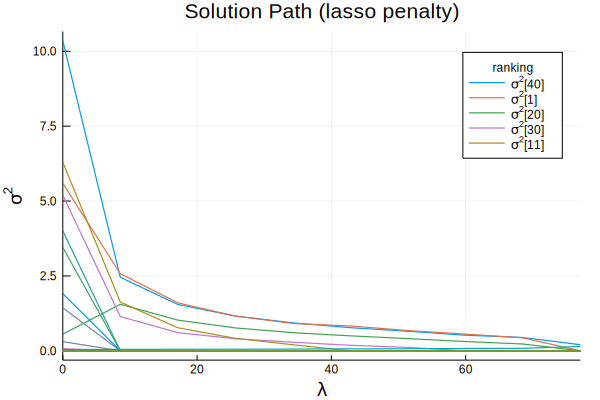

In [50]:
plotsolpath(σ2path_lasso, λpath_lasso; 
    title="Solution Path (lasso penalty)", xlab="\\lambda", ylab="\\sigma^2",
    linewidth=1.2)

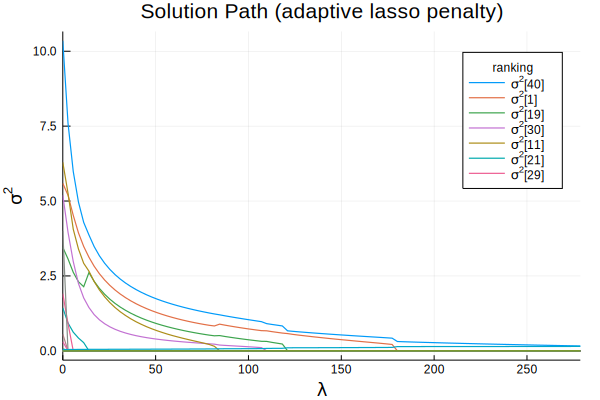

In [53]:
plotsolpath(σ2path_adlasso, λpath_adlasso; 
    title="Solution Path (adaptive lasso penalty)", 
    xlab="\\lambda", ylab="\\sigma^2", linewidth=1.2)

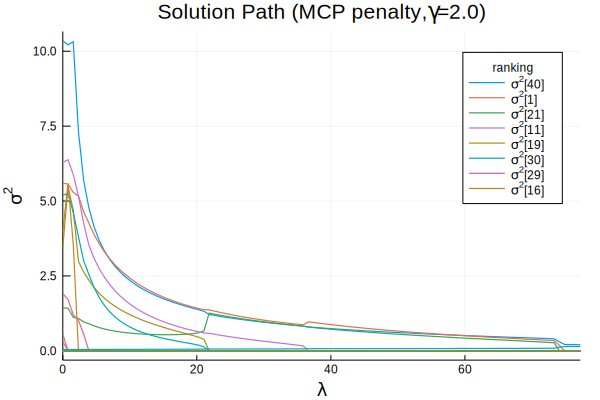

In [54]:
plotsolpath(σ2path_mcp2, λpath_mcp2; 
    title="Solution Path (MCP penalty, \\gamma=2.0)", 
    xlab="\\lambda", ylab="\\sigma^2", linewidth=1.2)

For MCP penalty, we used the default value `γ=2.0`. Instead, let's try `γ=2.69`, and plot the solution path. 

In [55]:
@time σ2path_mcp269, objpath_mcp269, λpath_mcp269 = 
        vcselectpath(y, X, V; penfun=MCPPenalty(2.69))

 91.828036 seconds (153.41 k allocations: 13.429 GiB, 4.59% gc time)


([5.59277 5.58026 … 0.0 0.0; 3.68246e-25 0.0 … 0.0 0.0; … ; 10.3486 10.1988 … 0.205045 0.201714; 0.0412181 0.0413791 … 0.144468 0.144619], [0.591124, 8.51234, 16.3563, 23.2846, 30.6362, 36.7403, 43.1315, 49.3383, 55.3611, 61.206  …  269.321, 270.89, 272.452, 274.008, 275.56, 275.59, 270.128, 270.504, 270.876, 271.246], 0.0:0.7806541522553025:77.28476107327495, [215, 117, 26, 74, 103, 49, 46, 46, 46, 46  …  68, 73, 78, 86, 99, 155, 38, 33, 33, 34])

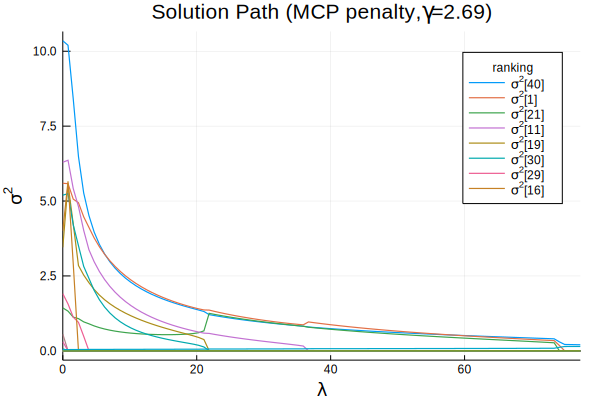

In [56]:
plotsolpath(σ2path_mcp269, λpath_mcp269; 
    title="Solution Path (MCP penalty, \\gamma=2.69)", 
    xlab="\\lambda", ylab="\\sigma^2", linewidth=1.2)